# Milestone 4 - Independent Project

## Author - Tariq Ayub



## Instructions

1. Generate a clear statement problem and provide the location for the datasetyou use.
2. Provide a clear solution to the problem for a non-technical audience.
3. Visually explore the data to generate insight and include summary statistics.
4. Use an appropriate statistical analysis method.
5. Prepare the data via cleaning, normalization, encoding, et cetera.
6. Generate and evaluate a working model (hypothesis, linear, or time series).
7. Draw direct inferences and conclusions from model results.
8. Use professional coding standards and techniques including:

    - explanatory markdown text
    - proper code comments
    - functions to minimize redundant code
    - minimize hard-coded variables

### Note
Please use the <a class="icon-pdf" title="Independent Project Rubric" href="https://library.startlearninglabs.uw.edu/DATASCI410/Handouts/DATASCI%20410%20Independent%20Project%20Rubric.pdf" target="_blank" rel="noopener">Rubric</a> as a general guide for your project.

# Abstract
hese data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

## Problem

Use the Data Set to perform the following:
	Perform classification and determine the follow:
   1. Based on wine profile predict if a wine belongs to a particular cultivar. 
   2. Evaluate model performance
   3. Improvements to the model using feature selection
   4. Improvements to the model using different classification techniques. 
   5. Perform simulation from the model
   6. Compare the performance and ability to generalize for the models

Original source:https://archive.ics.uci.edu/ml/datasets/Wine


## Conclusion

In [8]:
#importing libraries to impport dataset into the data frame

import pandas as pd
import numpy as np

wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)


In [14]:

wine_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [24]:
wine_data.describe()
#describe provide statistics summary. it is very helpful to eye ball individual variable and see 
#if varibale have any relationships and are worth exploring

,cultivars,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [22]:
wine_data.columns= ["cultivars", "Alcohol", "Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium",
                    "Total_phenols", "Flavanoids", "Nonflavanoid_phenols",
                    "Proanthocyanins", "Color_intensity", "Hue", 
                    "OD280/OD315_of_diluted_wines", "Proline"]

In [23]:
wine_data.head(10)

,cultivars,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


Text(0.5, 0, 'cultivars')

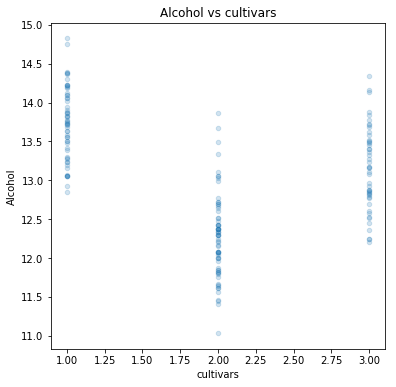

In [27]:
# importing metplot lib to create a simple scattered plot with the class on y axis. 
%matplotlib inline
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(6, 6)).gca() # define axis
wine_data.plot.scatter(x = 'cultivars', y = 'Alcohol', ax = ax, alpha = 0.2)
ax.set_title('Alcohol vs cultivars') # Give the plot a main title
ax.set_ylabel('Alcohol')# Set text for y axis
ax.set_xlabel('cultivars')

In [28]:
# we can see that type 1 cultivar has produces the highest alcohol content in wine which
#type 2 has the lowest content. For type 2 alcohol content is mostly concentrated btw 12 and 12.5.
#while for type1 its evenly spread out. 

C:\Users\T\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\T\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'City MPG')

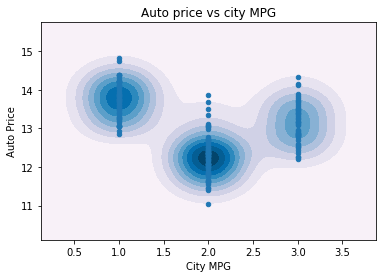

In [30]:
#importing seaborn to create a density plot. Give a very good idea of the ranges where most 
#data points are. 
import seaborn as sns
ax = sns.kdeplot(wine_data.loc[:, ['cultivars', 'Alcohol']], shade = True, cmap = 'PuBu')
wine_data.plot.scatter(x = 'cultivars', y = 'Alcohol', ax = ax)
ax.set_title('cultivars vs city MPG') # Give the plot a main title
ax.set_ylabel('Auto Price')# Set text for y axis
ax.set_xlabel('cultivars')

In [31]:
#highest desity of the alcohol content is is around 14 for type1 cultivar, around 13 for type3 and around 12.5 for type 2 cultivar

Text(0.5, 0, 'Malic_acid')

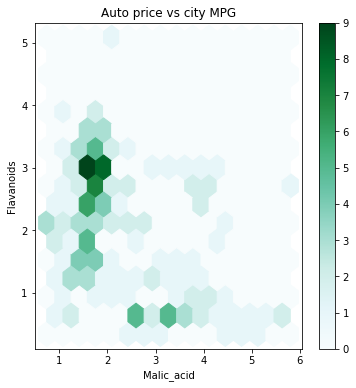

In [33]:
#hex binning is helpful to plot data with large number of points. 
ax = plt.figure(figsize=(6, 6)).gca() # define axis
wine_data.plot.hexbin(x = 'Malic_acid', y = 'Flavanoids', gridsize = 15, ax = ax)
ax.set_title('Malic_acid vs Flavanoids') # Give the plot a main title
ax.set_ylabel('Flavanoids')# Set text for y axis
ax.set_xlabel('Malic_acid')

In [34]:
#there is some correlation btw high Flavanoids (which is an antioxident) and having a high malic acid 
#wine. 

Text(0.5, 1.0, 'cultivars vs. City MPG \n with fuel type by color')

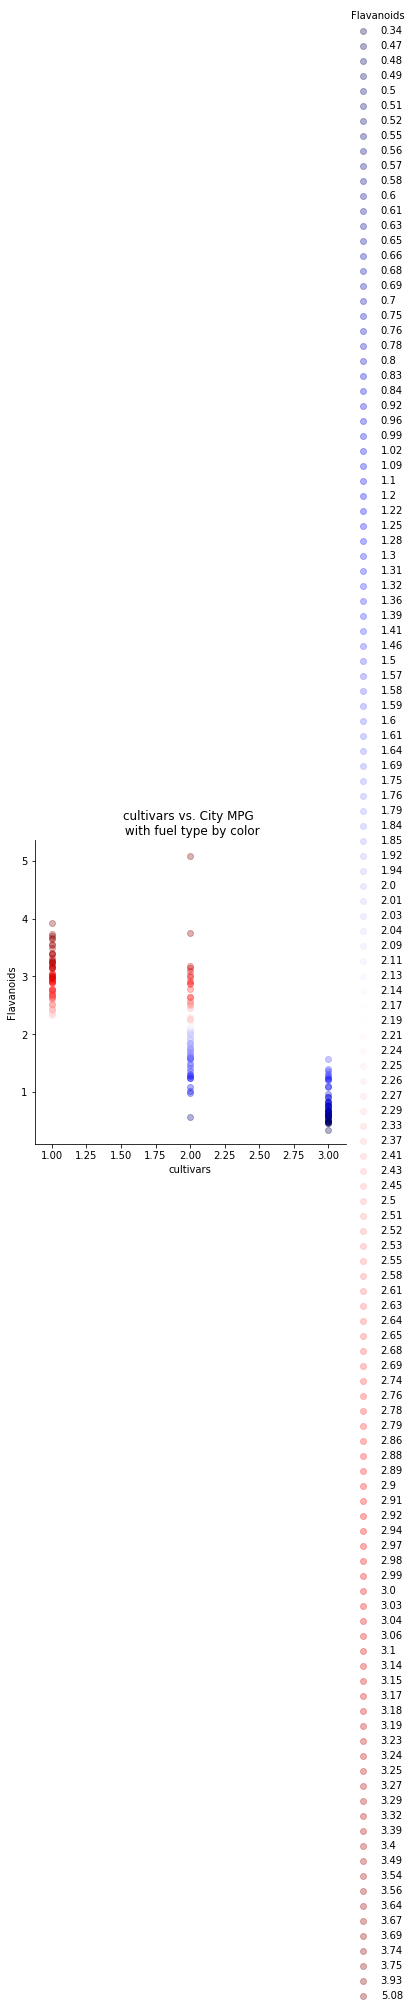

In [36]:
#The following code uses the intensity of due to show how a specific characteristic is spread across
#a class
sns.lmplot(x = 'cultivars', y = 'Flavanoids', 
           data = wine_data, 
           hue = "Flavanoids", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('cultivars')
plt.ylabel('Flavanoids')
plt.title('cultivars vs. City MPG \n with fuel type by color')

In [37]:
#type 1 cultivars are very high in Flavanoids hence a really good source of anti oxidents. while Cultivar type3 is 
#very low in Flavanoids. type 2 samples were found to have a range of Flavanoids levels. 

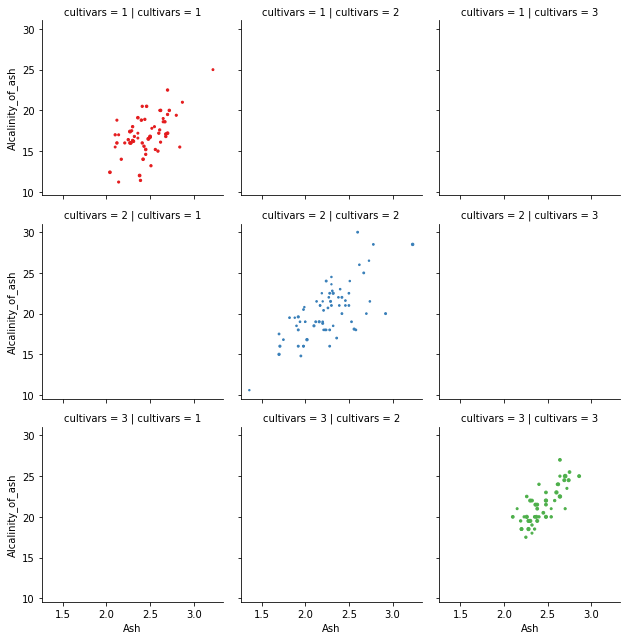

In [48]:
# the following code will create scattered plots for all types of plants with 3 dimentions to meansure
g = sns.FacetGrid(wine_data, 
                  col="cultivars", 
                  row='cultivars', 
                  hue="cultivars", 
                  palette="Set1")
g = g.map(plt.scatter, "Ash", "Alcalinity_of_ash", "Color_intensity") 

In [ ]:
#Alkalinity and ash content are directly propotional to each other "generally" speaking for all 
#types of cultivars. but all 3 have noticeable difference in the distribution of content in the samples.
# 1. type3 has a high ash and high alkilinity of ash 
# 2. type2 has very scattered ash and alkilinity of ash 
# 3. type1 has scattered but noticeablly low ash and alkilinity of ash